In [61]:
#Libraries
import numpy as np
import random
import copy as cp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Cards in deck and corresponding card values
cards=[2,3,4,5,6,7,8,9,10,'J','Q','K','A']
values=[2,3,4,5,6,7,8,9,10,10,10,10,11]

In [3]:
#Example draw of a card
random.choice(cards)

6

In [5]:
#Example draw of a value
random.choice(values)

4

This section of the code estimates the probability that the dealer will bust

In [47]:
def checkDealerBust(total=0, ace_list=None): #by default start with an empty hand
    if ace_list==None:
        aces=[] #Start with no aces (Keep track of aces because they may be counted as 11 or 1)
    else:
        aces=cp.deepcopy(ace_list)
    

    while total<17: #Until total is less than 17, the dealer with draw a card at random

        card_value=random.choice(values) #Draw a random value
        if card_value==11: #if an ace has been drawn, add it to the record
            aces.append(True)

        total+=card_value #add the drawn value to the hand total

        while total>21 and aces: #if busted but have an ace, then count ace as 1, not as eleven
            aces.pop()
            total-=10
        
    return total>21

In [50]:
#Estimate the probability that the dealer will bust
def getBustProb(total=0,aces=None,n_sims=10000): #by default run 10000 simulations
    n_busts=0 #Count number of busts
    for i in range(n_sims):
        n_busts += checkDealerBust(total,aces)
        
    return n_busts/n_sims

In [51]:
print("Estiamate of the probabability that the dealer will bust is:",getBustProb())

Estiamate of the probabability that the dealer will bust is: 0.2885


Suppose that a dealer starts with one card showing. Write a program that estimates the probability that the dealer will bust for each starting card. Visualize as a bar chart with card on the x-axis and probability of a bust on the y-axis.

In [54]:
estimates=[]
for init_card_value in values:
    if init_card_value!=11:
        estimates.append(getBustProb(init_card_value))
    else:
        estimates.append(getBustProb(init_card_value,[True]))

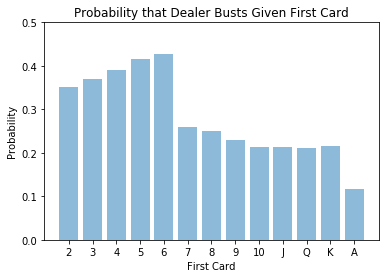

In [60]:
y_pos = np.arange(len(cards))

plt.bar(y_pos, estimates, align='center', alpha=0.5)
plt.xticks(y_pos, cards)
plt.ylabel('Probability')
plt.xlabel('First Card')
plt.title('Probability that Dealer Busts Given First Card')
plt.ylim(0,.5)
plt.show()